<a href="https://colab.research.google.com/github/Terrencebosco/Build_week_2/blob/master/build_week_2_(build).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# read in precleaned data
url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/clean_data_set_2_v2'
df = pd.read_csv(url)

# data
df.head()

,car,mileage,price,ext_color,int_color,city_mpg,high_mpg,transmission,drivetrain,engine,car_year,Make,size,flex_fuel,hybrid,turbo
0,Mazda3 i SV,54589,7352,Black,Black,29,41,6-Speed Automatic,FWD,I4 16V GDI DOHC,2015,Mazda,2.0L,0,0,0
1,Elantra SE,87130,6988,Silver,Gray,27,37,6-Speed Automatic,FWD,I4 16V MPFI DOHC,2015,Hyundai,1.8L,0,0,0
2,Rio SX,64101,7650,Red,Black,28,36,6-Speed Manual,FWD,I4 16V GDI DOHC,2013,Kia,1.6L,0,0,0
3,Optima LX,106575,4999,Silver,Gray,24,35,6-Speed Automatic,FWD,I4 16V GDI DOHC,2013,Kia,2.4L,0,0,0
4,Focus SE,82301,6491,Black,Black,26,36,6-Speed Automatic with Auto-Shift,FWD,I4 16V GDI DOHC,2014,Ford,2.0L,0,0,0


# EDA

In [ ]:
 # check pair plot to see relations
 sns.pairplot(df)

In [ ]:
numeric_features_list = df.select_dtypes(int)
numeric_features_list = numeric_features_list.drop('price', axis=1)

for feature in numeric_features_list:
    sns.jointplot(x="price", y=feature, data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}});

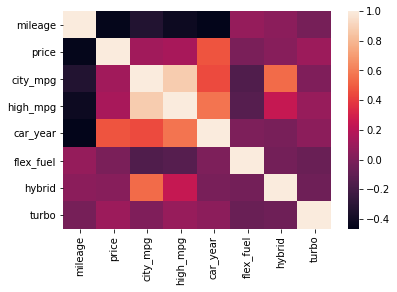

In [38]:
x_tab = df.corr()

sns.heatmap(x_tab)

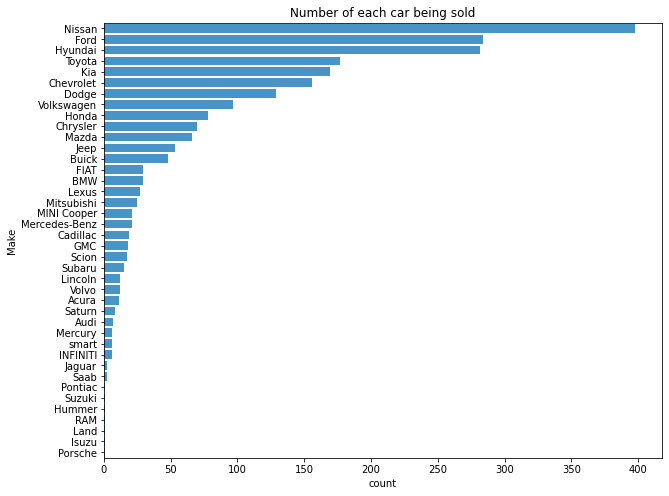

In [107]:
# plot number of cars by 'make'
ax = plt.figure(figsize=(10,8))

sns.countplot(data=df, y='Make',
               order=df['Make'].value_counts().sort_values(ascending=False).index,
              color='#3498db')

plt.title('Number of each car being sold');

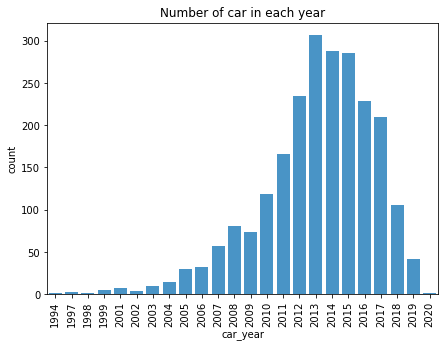

In [104]:
# plot number of cars by 'car_year'
ax = plt.figure(figsize=(7,5))
sns.countplot(df['car_year'], color='#3498db')

plt.title('Number of car in each year')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',  
);

79,739 is the mean mileage


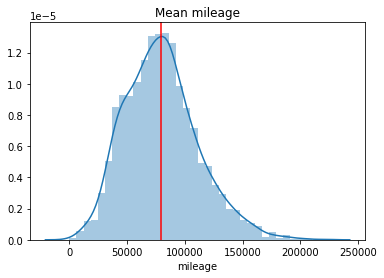

In [128]:
# plot mean mileage
mileage_mean = df['mileage'].mean()
sns.distplot(df['mileage'])
plt.axvline(df['mileage'].mean(), color='red')
plt.title('Mean mileage')
print(f'{mileage_mean:,.0f} is the mean mileage')

 ## Findings based on target vs feature


we can see that there are several features that effect the target(Price) of the used car. 

1. mileage vs price.

the price of the car is negativly correlated with the price of the car. as the mileae goes up the price of the car will go down.


2. mpg vs price. 

the MPG of the car, city and highway, are both positivly correlated with the price of the ca. this may be do to the fact that the newer cars have better mpg and thus cost more. not nessisarily because of the mpg but because of the year of the car. we can see this relationship in the heat map. the year of the car is related to the mpg of the car.


3. year of car vs price. 

the year is positivly correlated to the price of the car. the newer cars generally cost more on resale

4. flex fuel, tubo, hybrid vs price.

flex fuel has almost no effect on the resale value of a car. on the other hand cars that have tubos, or are hybrids have a positvive relationship with a cars resale value.

# Model Selection

In [39]:
target = 'price'
features = df.drop(target, axis=1)